In [1]:
import pandas as pd
import glob
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pickle

In [2]:

# Path to the folder containing CSV files
path = r'C:\Users\kesav\Guvi\guvi main\c5\data'

# Use glob to get all the CSV files in the folder
all_files = glob.glob(path + "/*.csv")
dataframes = []
# Loop through the list of files and read each one into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    dataframes.append(df)
# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(dataframes, ignore_index=True)

In [3]:
#df1.to_csv('singapore_flat.csv', index=False)

In [4]:
df_s=df1.copy()

In [5]:
df_s.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN


In [6]:
flat_type = {
    '1 ROOM': '1',
    '2 ROOM': '2',
    '3 ROOM': '3',
    '4 ROOM': '4',
    '5 ROOM': '5',
    'EXECUTIVE': '3',
    'MULTI GENERATION': 'MULTI-GENERATION',
    'MULTI-GENERATION': 'MULTI-GENERATION'
}

In [7]:
df_s['flat_type'] = df_s['flat_type'].map(flat_type)

In [8]:
df_s['flat_type'].unique(),len(df_s['flat_type'].unique())

(array(['1', '3', '4', '5', '2', 'MULTI-GENERATION'], dtype=object), 6)

In [9]:
flat_model = {
    'IMPROVED': 'Normal',
    'NEW GENERATION': '3GEN',
    'MODEL A': 'MODEL A',
    'STANDARD': 'Normal',
    'SIMPLIFIED': 'Normal',
    'MODEL A-MAISONETTE': 'Duplexes',
    'APARTMENT': 'APARTMENT',
    'MAISONETTE': 'Duplexes',
    'TERRACE': 'TERRACE',
    '2-ROOM': '2-ROOM',
    'IMPROVED-MAISONETTE': 'Duplexes',
    'MULTI GENERATION': '3GEN',
    'PREMIUM APARTMENT': 'APARTMENT',
    'Improved': 'Normal',
    'New Generation': '3GEN',
    'Model A': 'MODEL A',
    'Standard': 'Normal',
    'Apartment': 'APARTMENT',
    'Simplified': 'Normal',
    'Model A-Maisonette': 'Duplexes',
    'Maisonette': 'Duplexes',
    'Multi Generation': '3GEN',
    'Adjoined flat': 'APARTMENT',
    'Premium Apartment': 'APARTMENT',
    'Terrace': 'TERRACE',
    'Improved-Maisonette': 'Duplexes',
    'Premium Maisonette': 'Duplexes',
    '2-room': '2-ROOM',
    'Model A2': 'MODEL A2',
    'Type S1': 'TYPE S1',
    'Type S2': 'TYPE S2',
    'DBSS': 'Normal',
    'Premium Apartment Loft': 'APARTMENT',
    '3Gen': '3GEN'
}

In [10]:
df_s['flat_model'] = df_s['flat_model'].map(flat_model)

In [11]:
df_s['flat_model'].unique(),len(df_s['flat_model'].unique())

(array(['Normal', '3GEN', 'MODEL A', 'Duplexes', 'APARTMENT', 'TERRACE',
        '2-ROOM', 'MODEL A2', 'TYPE S1', 'TYPE S2'], dtype=object),
 10)

In [12]:
df_s['storey_range'].unique(),len(df1['storey_range'].unique())

(array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
        '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
        '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
        '43 TO 45', '49 TO 51'], dtype=object),
 17)

In [13]:
df_s['storey_range']=df_s['storey_range'].str[-2:]

In [14]:
df_s['storey_range'].unique(),len(df1['storey_range'].unique())

(array(['12', '06', '09', '03', '15', '21', '18', '27', '24', '30', '33',
        '42', '39', '36', '48', '45', '51'], dtype=object),
 17)

In [15]:
df_s['storey_range']=df_s['storey_range'].astype(int)

In [16]:
df_s['storey_range'].unique(),len(df1['storey_range'].unique())

(array([12,  6,  9,  3, 15, 21, 18, 27, 24, 30, 33, 42, 39, 36, 48, 45, 51]),
 17)

In [17]:
df_s['remaining_lease']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
875163    92 years 11 months
875164    69 years 09 months
875165    92 years 08 months
875166    62 years 10 months
875167    62 years 08 months
Name: remaining_lease, Length: 875168, dtype: object

In [18]:
# Define a regular expression to extract years and months
regex = r'(\d+)\s+years\s+(\d+)\s+months'

# Use str.extract to create new columns for years and months
df_s[['years', 'months']] = df_s['remaining_lease'].str.extract(regex)

# Convert the new columns to numeric (int), errors='coerce' will handle NaN cases
df_s['years'] = pd.to_numeric(df_s['years'], errors='coerce')
df_s['months'] = pd.to_numeric(df_s['months'], errors='coerce')

In [19]:
df_s['total_months'] = df_s['years'] * 12 + df_s['months']

In [20]:
mean_months = int(df_s['total_months'].mean())
mean_months

894

In [21]:
df_s.loc[df_s['total_months'].isnull(), 'total_months'] = mean_months

In [22]:
df_s.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        656847
years                  723630
months                 723630
total_months                0
dtype: int64

In [23]:
df_s.drop(columns=['years','remaining_lease','months'], inplace=True)
df_s.rename(columns={'total_months': 'remaining_lease'}, inplace=True)

In [24]:
df_s.info(),df_s.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875168 entries, 0 to 875167
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                875168 non-null  object 
 1   town                 875168 non-null  object 
 2   flat_type            875168 non-null  object 
 3   block                875168 non-null  object 
 4   street_name          875168 non-null  object 
 5   storey_range         875168 non-null  int32  
 6   floor_area_sqm       875168 non-null  float64
 7   flat_model           875168 non-null  object 
 8   lease_commence_date  875168 non-null  int64  
 9   resale_price         875168 non-null  float64
 10  remaining_lease      875168 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 70.1+ MB


(None,
 month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 resale_price           0
 remaining_lease        0
 dtype: int64)

In [25]:
df_s['town'].unique(),len(df_s['town'].unique())

(array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
        'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
        'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
        'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
        'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
        'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
        'PUNGGOL'], dtype=object),
 27)

In [26]:
df_s.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [27]:
# Regular expression to capture year and month
regex = r'(\d{4})-(\d{2})'

# Extract year and month into separate columns
df_s[['A_year', 'A_month']] = df_s['month'].str.extract(regex)

columns = [col for col in df_s.columns if col != 'resale_price'] + ['resale_price']
df_s = df_s.reindex(columns=columns)

In [28]:
# Reindex columns
df_s=df_s[['A_year','A_month','month','town','flat_type','block','street_name',
         'storey_range','floor_area_sqm','flat_model',
         'lease_commence_date','remaining_lease','resale_price']]

In [29]:
df_s = df_s.drop(columns=['month'])

In [30]:
df_s['flat_type'].unique(),len(df_s['flat_type'].unique())

(array(['1', '3', '4', '5', '2', 'MULTI-GENERATION'], dtype=object), 6)

In [31]:
df_s['A_month'] = df_s['A_month'].apply(pd.to_numeric, errors='coerce')
df_s['A_year'] = df_s['A_year'].apply(pd.to_numeric, errors='coerce')

In [32]:
df_s.columns

Index(['A_year', 'A_month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [33]:
df_s['remaining_lease'].min()

498.0

In [34]:
from sklearn.preprocessing import OrdinalEncoder
df_s['town'] = OrdinalEncoder().fit_transform(df_s[['town']])
df_s['street_name'] = OrdinalEncoder().fit_transform(df_s[['street_name']])
df_s['flat_model'] = OrdinalEncoder().fit_transform(df_s[['flat_model']])
df_s['flat_type'] = OrdinalEncoder().fit_transform(df_s[['flat_type']])
df_s['block'] = OrdinalEncoder().fit_transform(df_s[['block']])

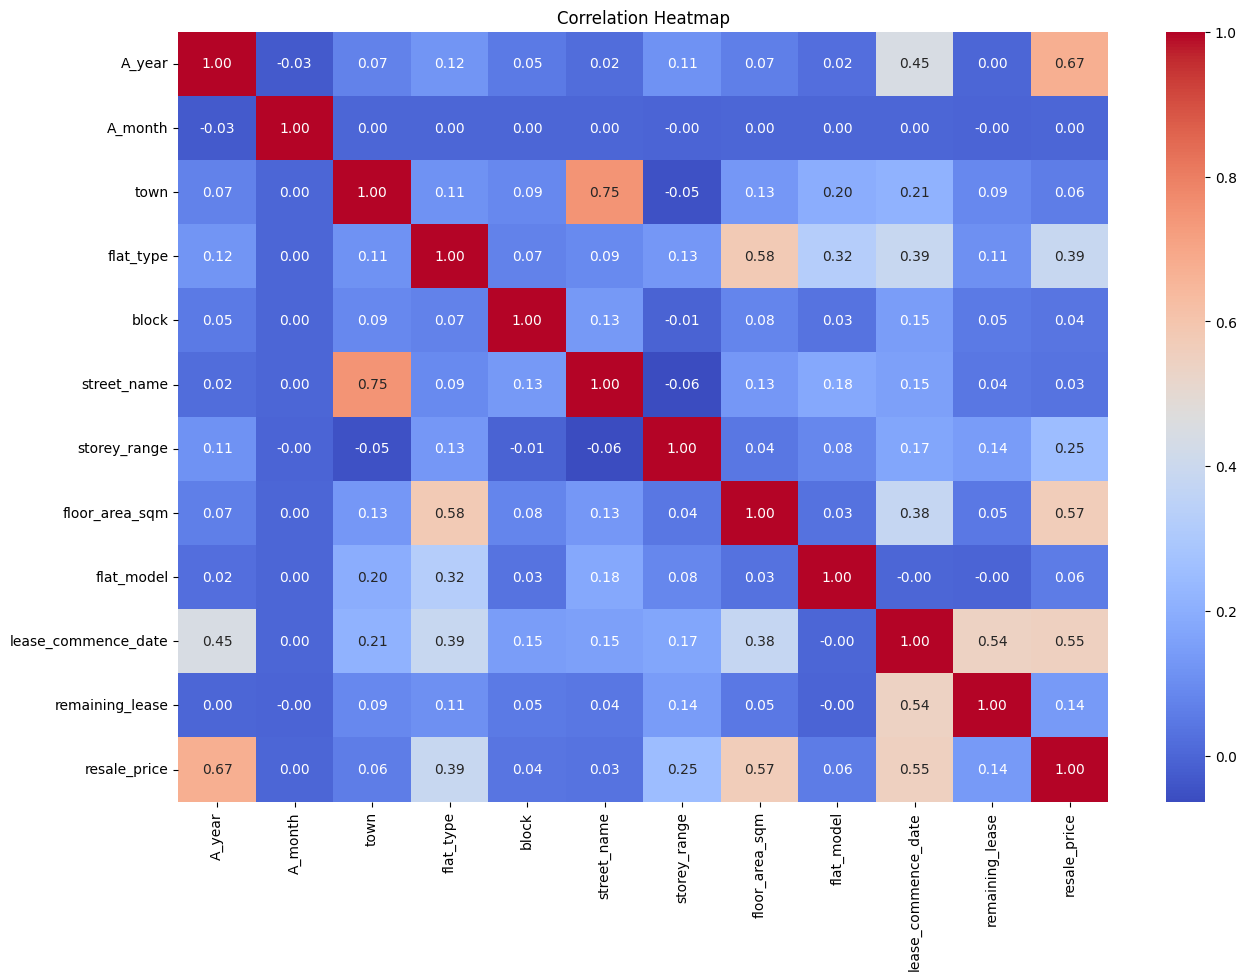

In [35]:
# Visualize the data as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_s.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Key Observations
1.A_year and Resale Price: A strong positive correlation (0.67), indicating that as the year increases, the resale price also tends to increase.
2.Flat Type and Floor Area (sqm): A moderate positive correlation (0.58), suggesting that certain flat types are associated with larger floor areas.
3.Floor Area (sqm) and Resale Price: A moderate positive correlation (0.57), suggesting that larger floor areas tend to have higher resale prices.
4.Lease Commence Date and Remaining Lease: A moderate positive correlation (0.54), indicating that the date a lease commenced is related to the remaining lease duration.



Dropping certain columns [A_month,block,street_name]since it has zero correlation and near to zero correlations with resale price

In [36]:
df_s = df_s.drop(columns=['A_month','block','street_name'])

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [38]:
df_s.columns

Index(['A_year', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price'],
      dtype='object')

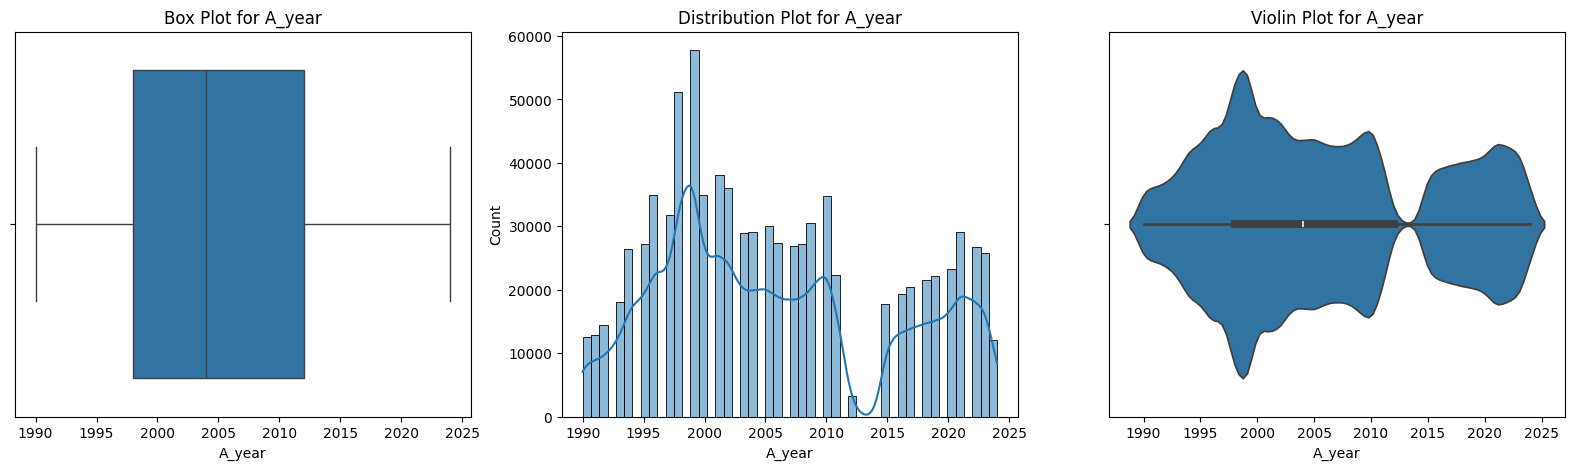

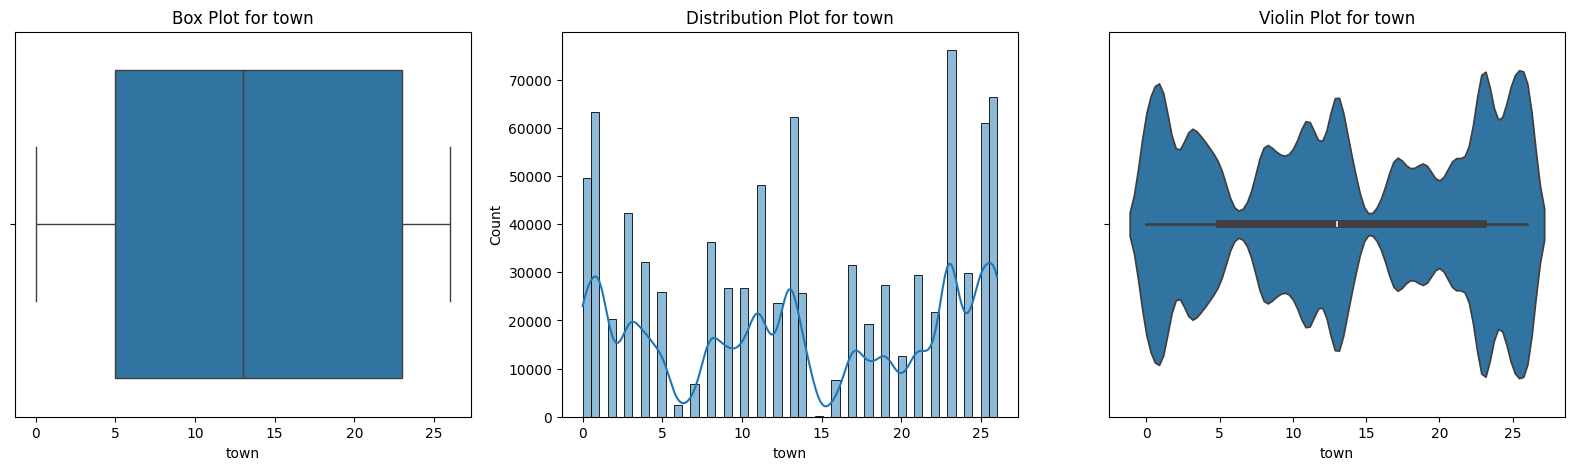

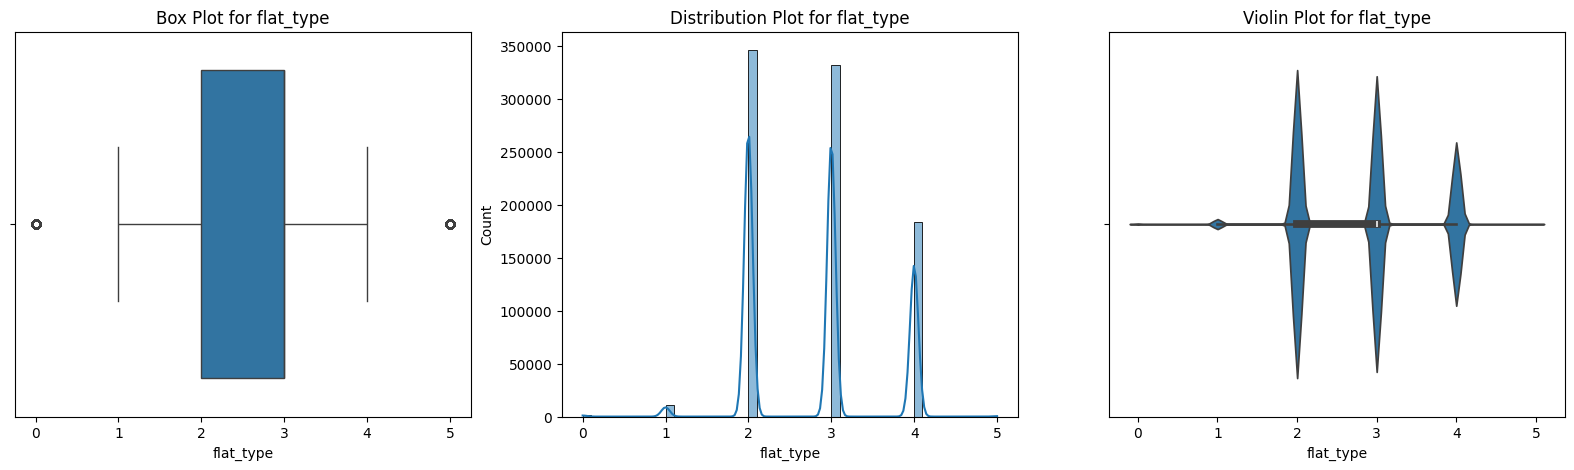

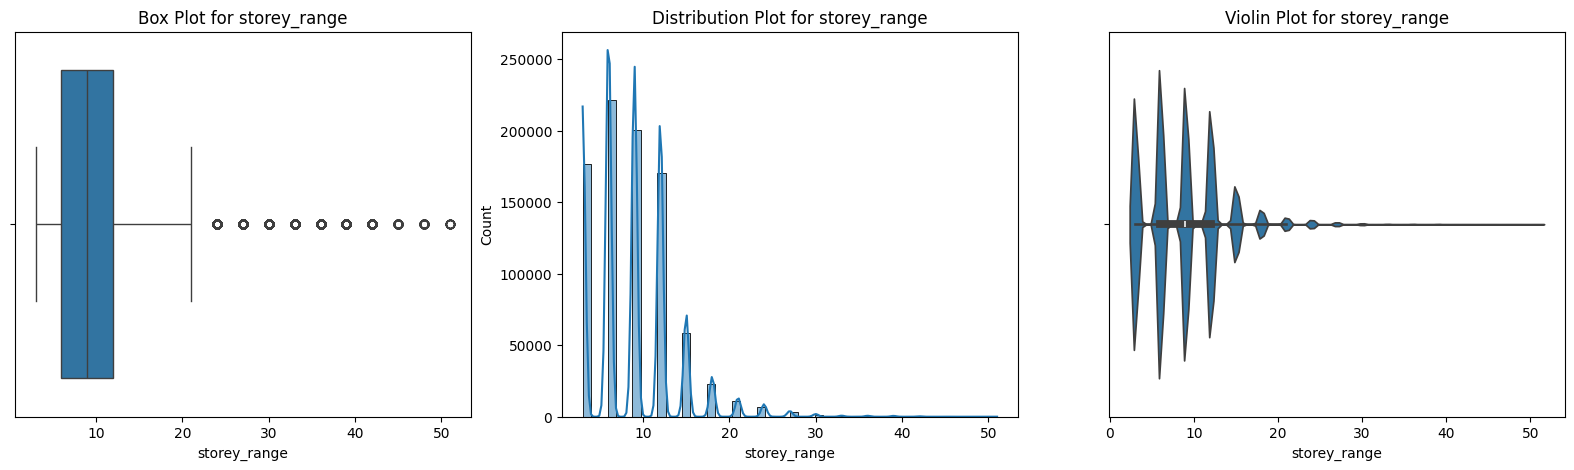

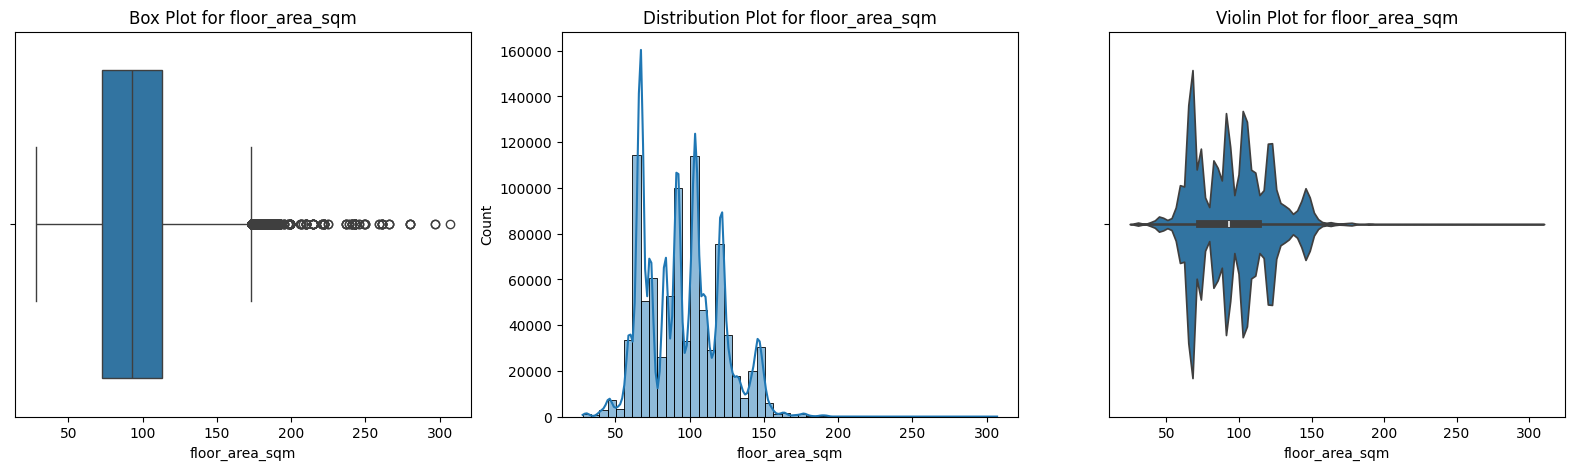

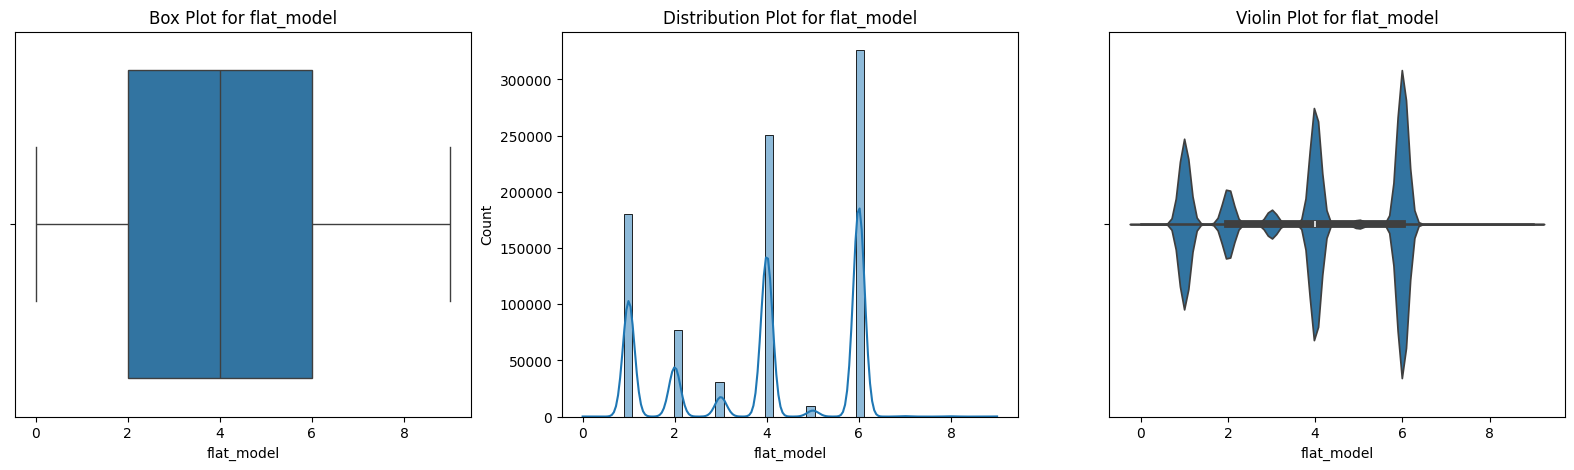

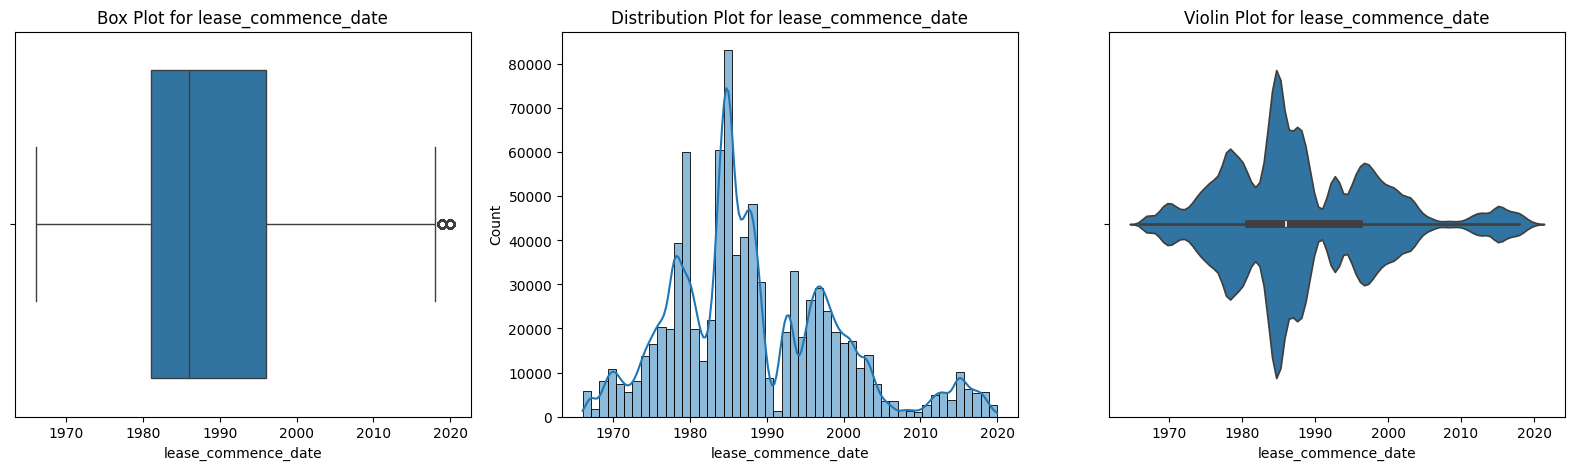

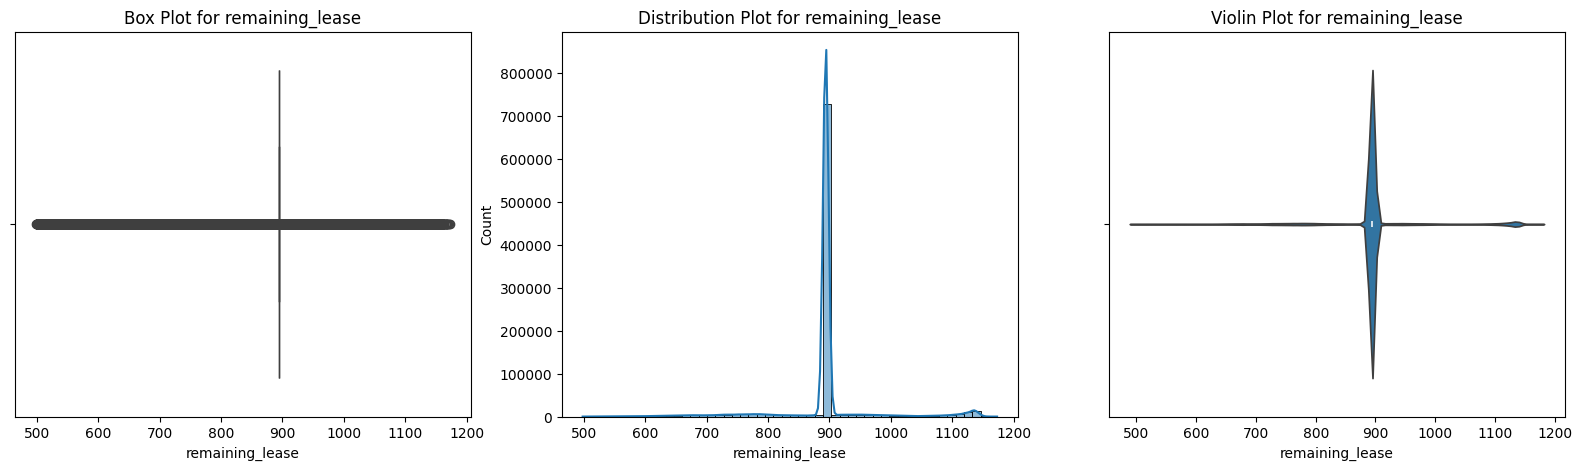

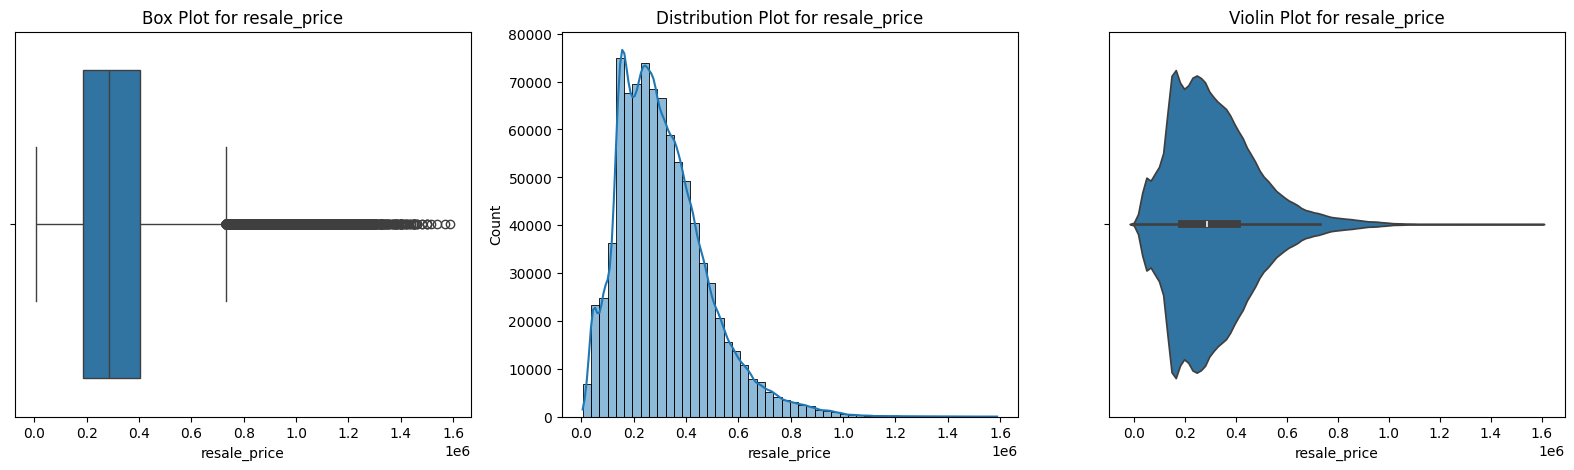

In [39]:
for i in ['A_year', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price']:
   plot(df_s, i)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Prepare the features (X) and target variable (y)
X = df_s.drop(columns=['resale_price'])  # Drop the target column from features
y = df_s['resale_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Create the RandomForestRegressor model
model_s_flat = RandomForestRegressor(n_estimators=100, random_state=42)

In [43]:
# Train the model
model_s_flat.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
#with open('model_s_flat.pkl', 'wb') as file:
    #pickle.dump(model_s_flat, file)

In [45]:
# Make predictions
y_pred = model_s_flat.predict(X_test)

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 750976677.6562498
R-squared: 0.9737032840503691


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
with open('model_linear.pkl', 'wb') as file:
    pickle.dump(model, file)

In [57]:
y_pred = model.predict(X_test)

In [58]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 6655316548.112367
R-squared: 0.766952857488473


In [59]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
875163,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months
875164,2024-06,YISHUN,5 ROOM,310,YISHUN RING RD,10 TO 12,135.0,Model A,1995,800000.0,69 years 09 months
875165,2024-06,YISHUN,5 ROOM,502B,YISHUN ST 51,10 TO 12,112.0,Improved,2018,738000.0,92 years 08 months
875166,2024-06,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,680000.0,62 years 10 months
